# EngiTuto

This is a basic tutorial showing how to use EngiBench and interact with problems.

Author: Florian Felten <ffelten@mavt.ethz.ch>

In [1]:
!pip install -e ".[all]"

Obtaining file:///Users/ffelte/Documents/EngiBench
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/mdolab/pyoptsparse to /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-f776nxbw/pyoptsparse_fc05cf6c39744c0a8fda2bd6f1b4cbd3
  Running command git clone --filter=blob:none --quiet https://github.com/mdolab/pyoptsparse /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-f776nxbw/pyoptsparse_fc05cf6c39744c0a8fda2bd6f1b4cbd3
  Resolved https://github.com/mdolab/pyoptsparse to commit 18d57aa2d97cae1c6f4251f7dd75ee69df00719b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Building editable for engibench (pyproject.toml) ... done
  Created wheel for engibench: filename=engibench-0.0.1-

## Step 1: Instantiate a Problem

Let us see the Beam bending problem

In [2]:
from engibench.problems.beams2d.v0 import Beams2D

/Users/ffelte/Documents/EngiBench/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
problem = Beams2D()
problem.reset(seed=9)

## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our beam is represented by 5000 pixels in `[0, 1]`. They are later reshaped as `(100, 50)`.

In [4]:
problem.design_space

Box(0.0, 1.0, (50, 100), float64)

In [6]:
problem.objectives

(('c', <ObjectiveDirection.MINIMIZE: 1>),)

In [7]:
problem.conditions

(('nelx', 100),
 ('nely', 50),
 ('volfrac', 0.35),
 ('rmin', 2.0),
 ('forcedist', 0.0),
 ('overhang_constraint', False))

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/beams_2d_v0) doing the following:

In [8]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['optimal_design', 'nelx', 'nely', 'volfrac', 'rmin', 'forcedist', 'overhang_constraint', 'c', 'optimization_history'],
        num_rows: 3880
    })
    val: Dataset({
        features: ['optimal_design', 'nelx', 'nely', 'volfrac', 'rmin', 'forcedist', 'overhang_constraint', 'c', 'optimization_history'],
        num_rows: 728
    })
    test: Dataset({
        features: ['optimal_design', 'nelx', 'nely', 'volfrac', 'rmin', 'forcedist', 'overhang_constraint', 'c', 'optimization_history'],
        num_rows: 243
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [9]:
my_design, idx = problem.random_design()
my_design.shape

(50, 100)

You can also render designs to see what they look like.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

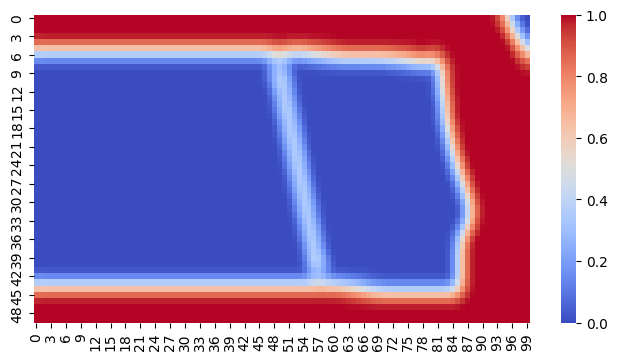

In [10]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

In [11]:
problem.simulate(my_design)

array([2463.819078])

In [12]:
opt_design, opt_history = problem.optimize(my_design)
opt_history[-1]

ExtendedOptiStep(obj_values=array([278.44655728]), step=99, design=array([1., 1., 1., ..., 1., 1., 1.]))

Now let's see how different is the optimal design from our random design above.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

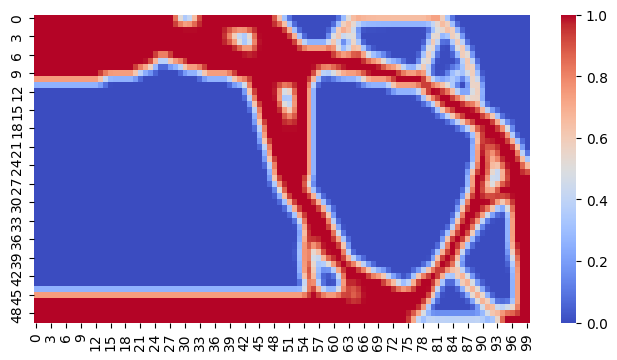

In [13]:
problem.render(opt_design)